In [7]:
#Importo le librerie necessarie
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go
from scipy.signal import butter,filtfilt,find_peaks
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
#pip install plotly

In [8]:
#Leggo il file, lo assegno ad una variabile e lo visualizzo in un DataFrame
url = 'https://raw.githubusercontent.com/Owyii/Project_work_its/main/DATA/center_sternum.txt'

data = pd.read_csv(url, sep = '\t')
data

Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX  MagnY  MagnZ        qw        qi        qj  \
0     -14.244280  1.404580   -454   -490   -178  0.792622  0.254952 -0.553850   
1     -12.290080 -7.969466   -454   -490   -177  0.736461  0.275124 -0.617969   
2      -4.961832 -7.450382   -454   -490   -177  0.729465  0.275246 -0.626118   
3       2.519084 -5.984733   -454   -492   -176  0.723413  0.277200 -0.632221   
4       5.404580  4.015267   -454   -492   -176  0.721948  0.280007 -0.632679   
...          ...       ...    ...    ...    ...       ...       ...       ...   
16501   2.305344 -0.671756   -494   -449   -126  0.650810  0.379162 -0.636402   
16502   2.488550 -0.702290   -494   -450   -125  0.650239  0.379803 -0.636708   
16503   3.374046 -0.900763   -494   -450   -125  0.649365  0.380627 -0.637227   
16504   3.664122 -1.587786   -495   -448   -124  0.648973  0.381329 -0.637348   
16505   4.061069 -1.343511   -495   -448   -124  0.648462  0.382336 -0.637471   

             qk  
0     -0.000031  
1      0.006806  
2      0.009827  
3      0.011383  
4      0.010193  
...         ...  
16501  0.166356  
16502  0.165960  
16503  0.165502  
16504  0.164953  
16505  0.164159  

[16506 rows x 16 columns]

In [9]:
#Aggiunta della colonna 'Time' e calcolo di 'Timeindex'
data['Time'] = pd.to_datetime(pd.to_numeric(data['Timestamp']),unit='s')
data['Timeindex'] = data.index/200
data

Log Mode  Log Freq   Timestamp     AccX     AccY    AccZ      GyroX  \
0             5       200  1576222772  947.086  435.662  70.638  -6.824428   
1             5       200  1576222772  969.168  387.777  88.877   6.183206   
2             5       200  1576222772  989.603  380.335  78.751  11.709920   
3             5       200  1576222772  954.894  418.033  88.328  17.877860   
4             5       200  1576222772  972.096  427.732  99.857  25.221370   
...         ...       ...         ...      ...      ...     ...        ...   
16501         5       200  1576222847  958.493  291.092 -54.290   1.664122   
16502         5       200  1576222847  954.650  288.042 -49.654   1.480916   
16503         5       200  1576222847  967.338  290.482 -63.867   1.114504   
16504         5       200  1576222847  965.630  300.852 -56.242   0.702290   
16505         5       200  1576222847  959.957  298.473 -55.998   0.290076   

           GyroY     GyroZ  MagnX  MagnY  MagnZ        qw        qi        qj  \
0     -14.244280  1.404580   -454   -490   -178  0.792622  0.254952 -0.553850   
1     -12.290080 -7.969466   -454   -490   -177  0.736461  0.275124 -0.617969   
2      -4.961832 -7.450382   -454   -490   -177  0.729465  0.275246 -0.626118   
3       2.519084 -5.984733   -454   -492   -176  0.723413  0.277200 -0.632221   
4       5.404580  4.015267   -454   -492   -176  0.721948  0.280007 -0.632679   
...          ...       ...    ...    ...    ...       ...       ...       ...   
16501   2.305344 -0.671756   -494   -449   -126  0.650810  0.379162 -0.636402   
16502   2.488550 -0.702290   -494   -450   -125  0.650239  0.379803 -0.636708   
16503   3.374046 -0.900763   -494   -450   -125  0.649365  0.380627 -0.637227   
16504   3.664122 -1.587786   -495   -448   -124  0.648973  0.381329 -0.637348   
16505   4.061069 -1.343511   -495   -448   -124  0.648462  0.382336 -0.637471   

             qk                Time  Timeindex  
0     -0.000031 2019-12-13 07:39:32      0.000  
1      0.006806 2019-12-13 07:39:32      0.005  
2      0.009827 2019-12-13 07:39:32      0.010  
3      0.011383 2019-12-13 07:39:32      0.015  
4      0.010193 2019-12-13 07:39:32      0.020  
...         ...                 ...        ...  
16501  0.166356 2019-12-13 07:40:47     82.505  
16502  0.165960 2019-12-13 07:40:47     82.510  
16503  0.165502 2019-12-13 07:40:47     82.515  
16504  0.164953 2019-12-13 07:40:47     82.520  
16505  0.164159 2019-12-13 07:40:47     82.525  

[16506 rows x 18 columns]

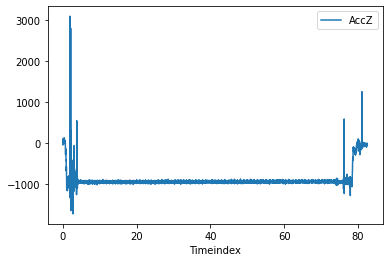

In [10]:
#Grafico 'Timeindex'
ax = plt.gca()

data.plot(kind='line',x='Timeindex',y='AccZ',ax=ax)

plt.show()

In [14]:
############################BUTTER SU ACCELEROMETRO##################################
b,a = butter(3,5,'lowpass', fs = 200)
result = filtfilt(b,a,data['AccZ'])
df_Accz = pd.DataFrame(result)
fig_accz = ex.line(df_Accz)
fig_accz.show()
############################BUTTER SU GIROSCOPIO#####################################
df_to_fil = data.copy()
b,a = butter(10,4,'lowpass', fs = 200)
result = filtfilt(b,a,df_to_fil['GyroX'])
df_res = pd.DataFrame(result)
fig_fil = ex.line(df_res)
fig_fil.show()


In [17]:
fig_2x = go.Figure()
fig_2x.add_trace(go.Scatter(x=(data.index)-2000,y=data['GyroX'],
                            opacity=0.5,
                            name = 'Segnale non filtrato'))
fig_2x.add_trace(go.Scatter(x=df_res.index,y=df_res[0],
                            name = 'Segnale filtrato'))

fig_2x.show()

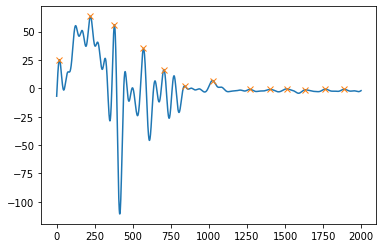

In [18]:
result = result[0:2000]

picchi, _ = find_peaks(result,height=-2,distance=100)
picchi

plt.plot(result)
plt.plot(picchi, result[picchi], "x")
plt.show()